# Datafindings: Ford GoBike system San Fransisco - Bike trends
## by Matthias Heyvaert

## Introduction
The dataset we're examining is called 'Ford GoBike System Data'. The set includes data about a bike-sharing system in the San Francisco Bay Area.
The dataset consists of information of 183 412 bike trips, including start/end point, user_type, member-gender, member birth of year,...
 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
#read dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
#check datatypes
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
#check for missings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
#check dimension of dataset
df.shape

(183412, 16)

In [7]:
#check if duplicated rows
df.duplicated().sum()

0

#### Based on descriptives above I noticed there were some quality issues in the dataset I needed to adress:
- change datatype to datetime for variables 'start_time' and 'end_time'
- change datatype for variable 'member_birth_year' from float to integer
- To do proper analysis I chose to create extra variables 'hour', 'day of week' based on variable 'start_time'
- Adress missing values

In [8]:
#copy dataset to do preliminary wrangling
df_clean = df.copy()

#### Define: Change datatypes to datetime and create extra variables 'hour_of_day', 'day_of_week'


#### code:

In [9]:
# change data type for variables 'start_time' and 'end_time' to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# extract day of week and hour from variable 'start_time'
df_clean['hour_of_day']= df_clean['start_time'].dt.hour
df_clean['day_of_week']= df_clean['start_time'].dt.day_name()

#### Test

In [11]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour_of_day,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,23,Thursday


https://datascientyst.com/convert-datetime-day-of-week-name-number-in-pandas/
<br> https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

#### Define: Remove missing values

#### Code:

In [12]:
#remove missing values
df_clean.dropna(subset = ['member_gender'], inplace = True)

https://www.w3schools.com/python/pandas/ref_df_dropna.asp
<br>https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

#### Test:

In [13]:
#check if missing values are removed
print(df_clean.member_gender.isna().sum())
print(df_clean.member_birth_year.isna().sum())
print(df_clean.info())

0
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               175147 non-null int64
start_time                 175147 non-null datetime64[ns]
end_time                   175147 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     175147 non-null float64
start_station_longitude    175147 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       175147 non-null float64
end_station_longitude      175147 non-null float64
bike_id                    175147 non-null int64
user_type                  175147 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    175147 non-null object
hour_of_day                175147 non-null int64
day_of_week    

Next to that we notice other missing values in variables 'start_station_id', 'start_station_name', 'end_station_name', 'end_station_id'. We will repeat step above for these variables 

In [14]:
#remove missing values
df_clean.dropna(subset = ['start_station_id'], inplace = True)

In [15]:
print(df_clean.start_station_id.isna().sum())
print(df_clean.start_station_name.isna().sum())
print(df_clean.end_station_id.isna().sum())
print(df_clean.end_station_name.isna().sum())
print(df_clean.info())

0
0
0
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
hour_of_day                174952 non-null int64
day_of_week

In [16]:
df_clean.shape

(174952, 18)

All missing values are removed from the dataset

#### Define: change datatype to integer

#### code

In [17]:
#change datatype to integer
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

#### Test

In [18]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour_of_day,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,Thursday


### What is the structure of your dataset?

Before the preliminary wrangling, the dataset contains 16 variables and 183 412 rows. After the preliminary wrangling, the dataset contains 18 variables and 174 952 rows.

Below an overview of the original variables in the dataset
<br>duration_sec               
start_time                 
end_time                   
start_station_id           
start_station_name        
start_station_latitude     
start_station_longitude    
end_station_id             
end_station_name           
end_station_latitude      
end_station_longitude      
bike_id                    
user_type                  
member_birth_year          
member_gender              
bike_share_for_all_trip    
<br>
Following variables were added
<br>hour_of_day                     
day_of_week                
                   

### What is/are the main feature(s) of interest in your dataset?

The main interest in our dataset is to see what the relationship is of duration of a bike trip with the other variables. What also interesting to see is when there is high demand and low demand for bikes, based on variables hour_of_day, day_of_week, month. Also insights which start points and end points are most popular are interesting.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Trip duration, and start and end point will be used heavily to understand the usage of bikes and relationships between different features.

## Univariate Exploration


As mentioned above we're most interested in variables trip duration, day of week and hour of day. Therefore we will do some univariate exploration on these variable before moving over to explore the relationship between 2 or more variables.

(0, 5000)

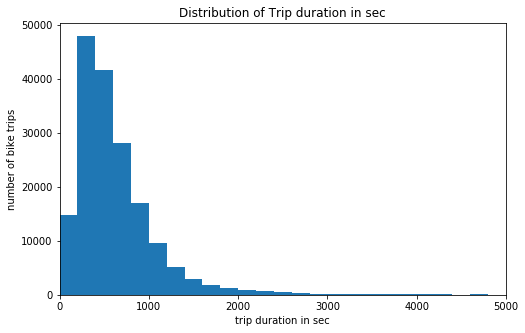

In [19]:
binsize = 200
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlabel('trip duration in sec')
plt.ylabel('number of bike trips')
plt.title('Distribution of Trip duration in sec')
plt.xlim(0, 5000)

We limited the x-axis to value of 5000.

In [20]:
df_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

As we can see in visuals above, the distribution of trip duration is skewed to the right, and follows a log-normal distribution. To get a better view of the data I will change the scale to log.

In [21]:
np.log10(df_clean['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


(32.441570647050384, 10000)

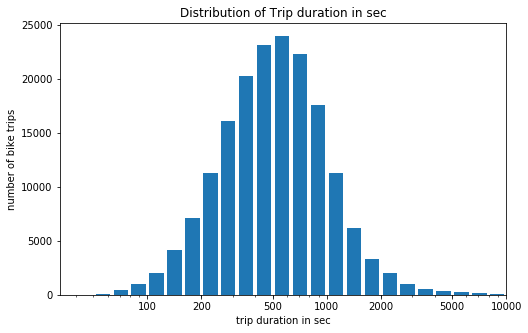

In [22]:
binsize= 0.1
bins = 10 ** np.arange(1.5, np.log10(df_clean['duration_sec'].max())+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins, rwidth = 0.8)
plt.xlabel('trip duration in sec')
plt.ylabel('number of bike trips')
plt.title('Distribution of Trip duration in sec')
plt.xscale('log')
plt.xticks([100, 200, 500, 1000, 2000, 5000, 10000], [100, 200, 500, 1000, 2000, 5000, 10000])
plt.xlim(0,10000)

Visual shows that the most trips last between 400 seconds and 900 seconds, with a peak at 600 seconds. This means that most trips are short trips between 5 and 10 minutes

Next we will explore the distribution of the days in week

In [23]:
days_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vdays = pd.api.types.CategoricalDtype(ordered=True, categories=days_week)
df_clean['day_of_week'] = df_clean['day_of_week'].astype(vdays)

In [24]:
base_color = sb.color_palette()[0]

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

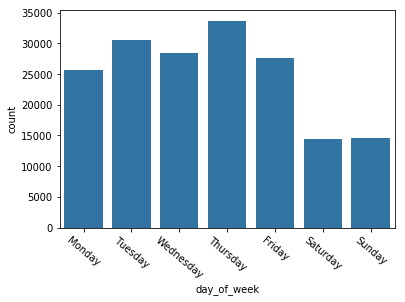

In [25]:
sb.countplot(data = df_clean, x = 'day_of_week', color = base_color)
plt.xticks(rotation = 320)

Visual above clarifies that the amount of bikes are a lot lower in the weekend than on weekdays, with a peak on thursday.

Next we will explore the distribution of the hours in a day

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

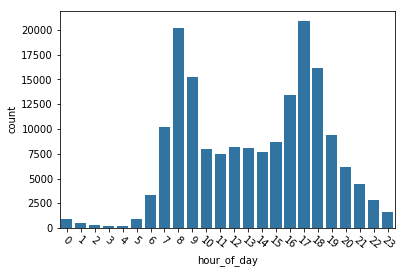

In [26]:
sb.countplot(data = df_clean, x = 'hour_of_day', color = base_color)
plt.xticks(rotation = 320)

In visual above we can see two peaks. First at 8:00 AM, second at 17:00 PM, the 2 rush moments of the day. In the night the bike trips are the lowest, which seems logical

Next we want to check the distribution of the age of the bike riders. Since age is not a feature in the dataset, I will create an extra feature by reducing 2019 (since all bike trips were mede in 2019) by the member_birth_year.

In [27]:
df_clean['age'] = 2019 - df_clean['member_birth_year']

(10, 100)

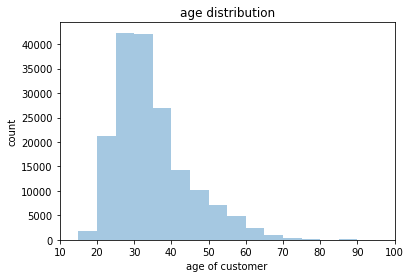

In [28]:
binsize = 5
bins = np.arange(10, df_clean['age'].max()+binsize, binsize)
sb.distplot(df_clean['age'], kde = False, bins = bins)
plt.xlabel('age of customer')
plt.ylabel('count')
plt.title('age distribution')
plt.xlim(10,100)

Most trips were made by people between age 25 and 35, after age 40 the distribution is skewed to the right. Which seems logical since older people might not be fit enough to ride bikes.

(-1.1072592340323726,
 1.1203835586186992,
 -1.1199361631365747,
 1.1077066295144971)

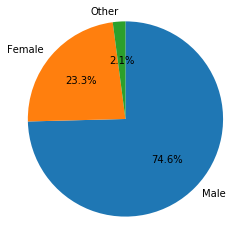

In [29]:
sorted_counts = df_clean['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct= '%1.1f%%')
plt.axis('square')

Majority of the bike users are male

https://www.tutorialsandyou.com/matplotlib/how-to-show-percentage-and-value-in-matplotlib-pie-chart-12.html#:~:text=If%20you%20want%20to%20show,be%20enclosed%20within%20the%20%25%20sign.

(-1.1073121887520356,
 1.107227178965096,
 -1.1054688582560726,
 1.1090705094610591)

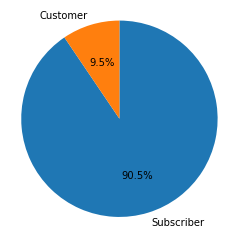

In [30]:
sorted_counts_2 = df_clean['user_type'].value_counts()
plt.pie(sorted_counts_2, labels = sorted_counts_2.index, startangle = 90, counterclock = False, autopct= '%1.1f%%')
plt.axis('square')

Majority of the users are subscribers with 90,5%

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

No unusual transformation were made, except some small data wrangling actions. For variable trip duration, there were a lot of high values, so we only selected values lower than 5000 to make the visual more clear. Also a log-scale was used because the distribution was skewed to the right

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Both trip duration and age of the customer were both skewed to the right. For trip duration we changed to scale to log.
For age of the customer, distribution seems logical, most bike trips were made by adults.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5,1,'trip duration per gender')

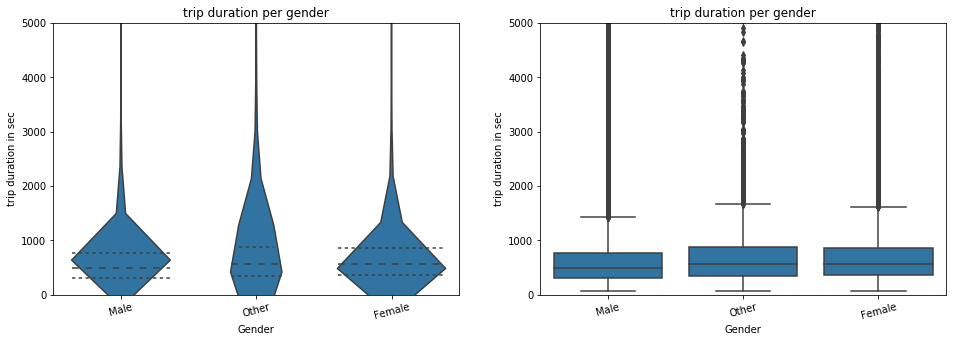

In [31]:
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color, inner='quartile')
plt.xticks(rotation=15);
plt.ylim(0,5000)
plt.xlabel("Gender")
plt.ylabel('trip duration in sec')
plt.title('trip duration per gender')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='member_gender', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0,5000)
plt.xlabel("Gender")
plt.ylabel('trip duration in sec')
plt.title('trip duration per gender')

In [32]:
df_clean.groupby('member_gender').duration_sec.mean()

member_gender
Female    778.872761
Male      672.394851
Other     997.328489
Name: duration_sec, dtype: float64

In both the violon plot as in the box plot we can notice that the inter quartile range and the median are higher for females than for males. Also the average trip duration is higher in the female group. But the mean in group 'other' is the highest, however the IQR is simular than that of females, which possibly can be caused by more outliers.

Text(0.5,1,'trip duration per user_type')

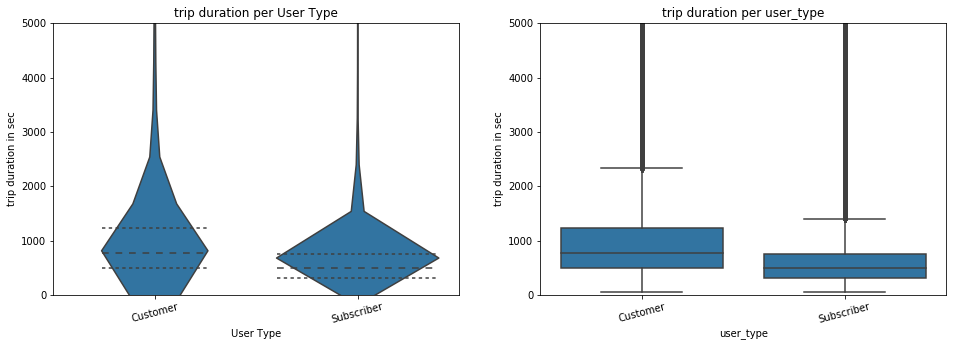

In [33]:
plt.figure(figsize = [16, 5])

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data=df_clean, x='user_type', y='duration_sec', color=base_color, inner='quartile')
plt.xticks(rotation=15);
plt.ylim(0,5000)
plt.xlabel("User Type")
plt.ylabel('trip duration in sec')
plt.title('trip duration per User Type')

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_clean, x='user_type', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.ylim(0,5000)
plt.xlabel("user_type")
plt.ylabel('trip duration in sec')
plt.title('trip duration per user_type')

In both visuals we can conclude that subscribers tends to take shorter bike trips than customers.

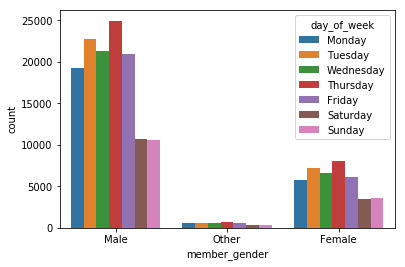

In [34]:
sb.countplot(data = df_clean, x = 'member_gender', hue = 'day_of_week')

Observation in visual above is that we can make the same conclusion for the 3 gender groups. Least bike trips were made during the weekends. Most biketrips were made on thursday followed by tuesday.

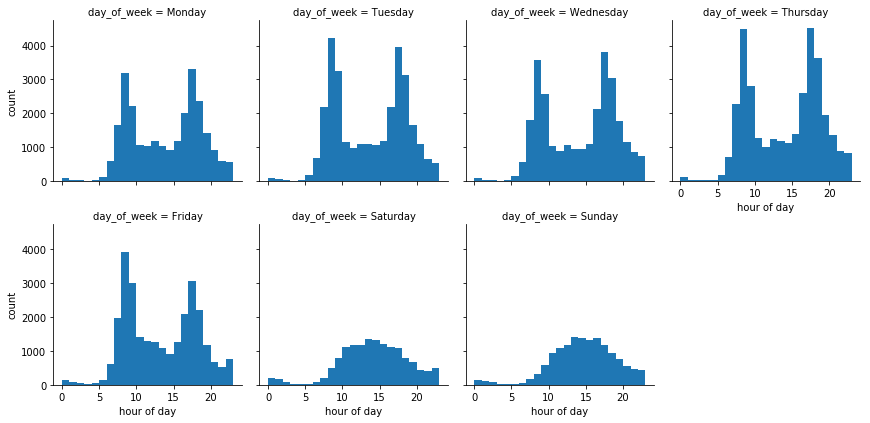

In [35]:
bin_edges = np.arange(0,24,1)
g = sb.FacetGrid(data = df_clean, col = 'day_of_week', col_wrap = 4)
g.map(plt.hist, 'hour_of_day', bins = bin_edges)
g.set_axis_labels("hour of day", "count")

In weekdays the distribution of bike rides is different as those in the weekends. On weekdays we see the most bike trips during rush hours. As in the weekend most people rent bikes between 10:00 PM and 18:00 AM

In [36]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour_of_day,day_of_week,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,Thursday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,Thursday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17,Thursday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23,Thursday,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23,Thursday,60


(0, 20000)

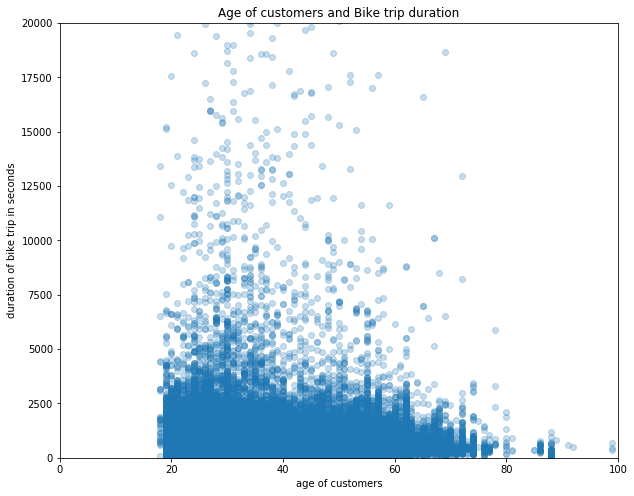

In [37]:
plt.figure(figsize = [10, 8])
plt.scatter(data = df_clean, x = 'age', y = 'duration_sec', alpha = 1/4)
plt.xlabel('age of customers')
plt.ylabel('duration of bike trip in seconds')
plt.title('Age of customers and Bike trip duration')
plt.xlim(0,100)
plt.ylim(0,20000)

Most bike trips have a duration less than 5000 seconds and most customers have an age below 60. We also notice that younger customers tends to take longer trips than customers with a higher age.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


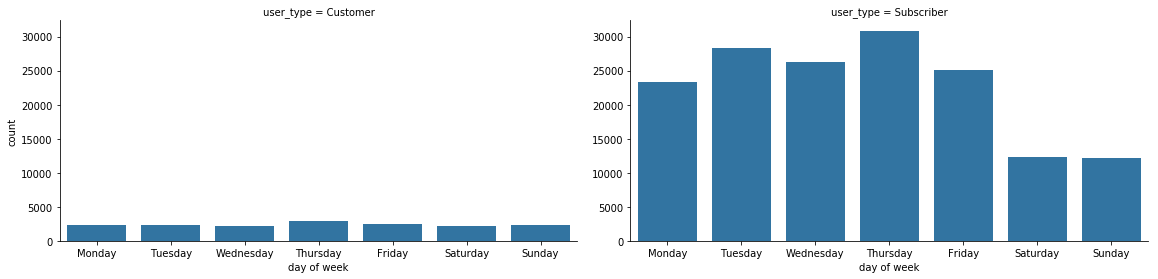

In [50]:
g = sb.FacetGrid(df_clean, col = 'user_type', size = 4, aspect = 2)
g.map(sb.countplot, 'day_of_week', hue_order = 'day_of_week')
g.set_axis_labels("day of week", "count")

The amount of bike trips in the weekends in significantly lower than on weekdays for subscribers. For customers the amount of bike trips is much more evenly distributed throughout the days.





### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Based on the bivariate exploration we can conclude that trip duration and age of the customers are dependable. Customers between the age of 20 and 60 tends to take longer bike trips than customers with an age above 60.
<br>
<br>
During weekdays we can spot peaks during rush hours, during weekends the amount of bike trips follows a more normal distribution.
<br>
<br>
We can also spot diffirences in the usage of bikes between subscribers and customers. Subscribers take more trips during the week than during weekends, customers the other way around. Customers also tends to take longer bike trips than subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

During bivariate exploration we saw that a lot more trips were taken by males than by females. But we can see the same trend for males and females regarding bike trips during the days in the week. The trip duration for both males and females are relatively in line with each other (females take slightly longer bike trips)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0.5,0.98,'Trip duration in sec per user type and age')

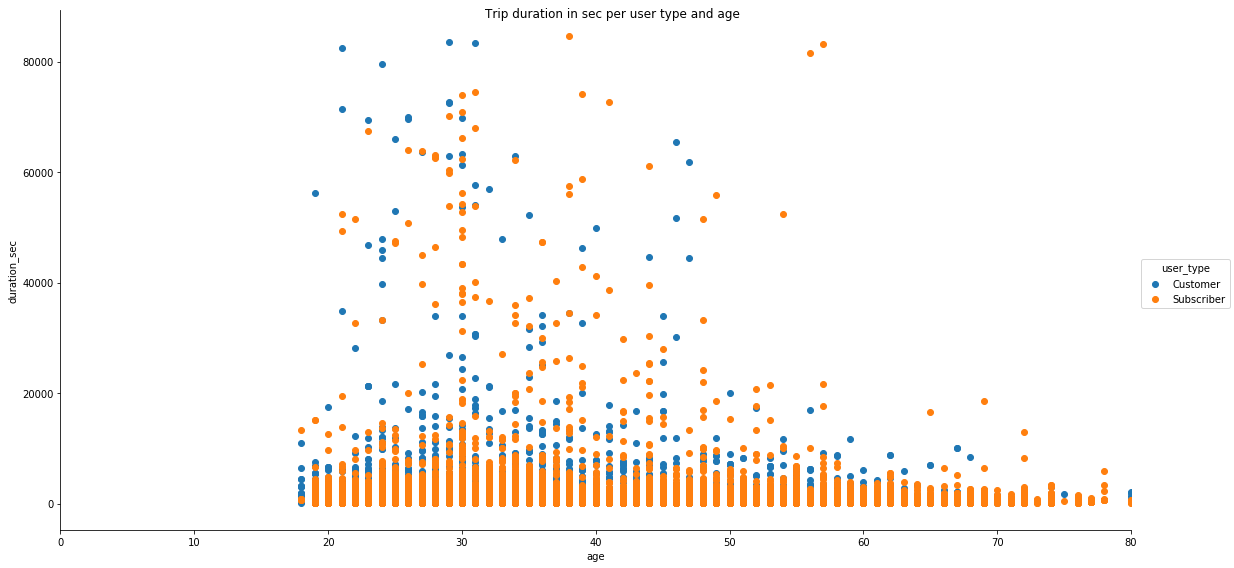

In [74]:
g = sb.FacetGrid(data = df_clean, col='user_type', size=8, aspect = 2)
g.map(plt.scatter, 'age', 'duration_sec')
g.add_legend()
g.set(xlim = (0,80))
g.fig.suptitle('Trip duration in sec per user type and age')

Both customers and subscribers take longer trips between the age of 20 and 60 than after the age of 60.

Text(0.5,0,'day of week')

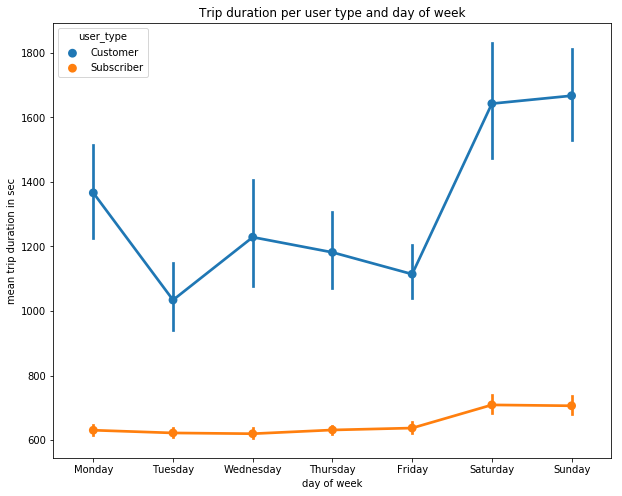

In [86]:
plt.figure(figsize = [10, 8])
sb.pointplot(data = df_clean, x = 'day_of_week', y =df_clean['duration_sec'], hue = 'user_type')
plt.title('Trip duration per user type and day of week')
plt.ylabel('mean trip duration in sec')
plt.xlabel('day of week')

Just as we saw during bivariate exploration also in graph above we can conclude that customers take longer bike trips than subscribers. A possible reason for this is that subscribers use bikes mostly as commuting trafic (see peaks in rush hour during bivariate exploration), whereas customers use bikes for leisure.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Just as during bivariate exploration, multivariate exploration shows that duration of bike trips decline when customers reaches an older age, both for customers and subscribers. Customers take longer bike trips than subscribers both during the week as during the weekend. For both customers and subscribers the mean duration of a bike trip is higher in the weekend than during weekdays. Possible explanation for this is that bike trips during weekdays are most used for commuting trafic.
### Were there any interesting or surprising interactions between features?

No unexpected interactions between features spotted.